## Imports

In [ ]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats as scp
from matplotlib.pyplot import cm

##Graphs

In [ ]:
graph_g = nx.read_gml("graph_dolphins.gml", label='id')
jazz_g = nx.read_gml("graph_jazz_collab.gml", label='id')
karate_g = nx.read_gml("graph_karate.gml", label='id')

graph_list = [
    graph_g,
    jazz_g,
    karate_g
    ]

output_strings = [
    "Dolphin Social Network",
    "Jazz Collaboration Network",
    "Zachary Karate Club",
]



str_n_graphs = list(zip(output_strings, graph_list))

## A04.1  Community detection

Dolphin Social Network Clauset Newman and Moore: 4
Dolphin Social Network Clauset Newman and Moore randomized: 6
Dolphin Social Network Girvan-Newman: 5
Dolphin Social Network Girvan-Newman randomized: 18
Jazz Collaboration Network Clauset Newman and Moore: 4
Jazz Collaboration Network Clauset Newman and Moore randomized: 6
Jazz Collaboration Network Girvan-Newman: 39
Jazz Collaboration Network Girvan-Newman randomized: 112
Zachary Karate Club Clauset Newman and Moore: 3
Zachary Karate Club Clauset Newman and Moore randomized: 5
Zachary Karate Club Girvan-Newman: 5
Zachary Karate Club Girvan-Newman randomized: 6


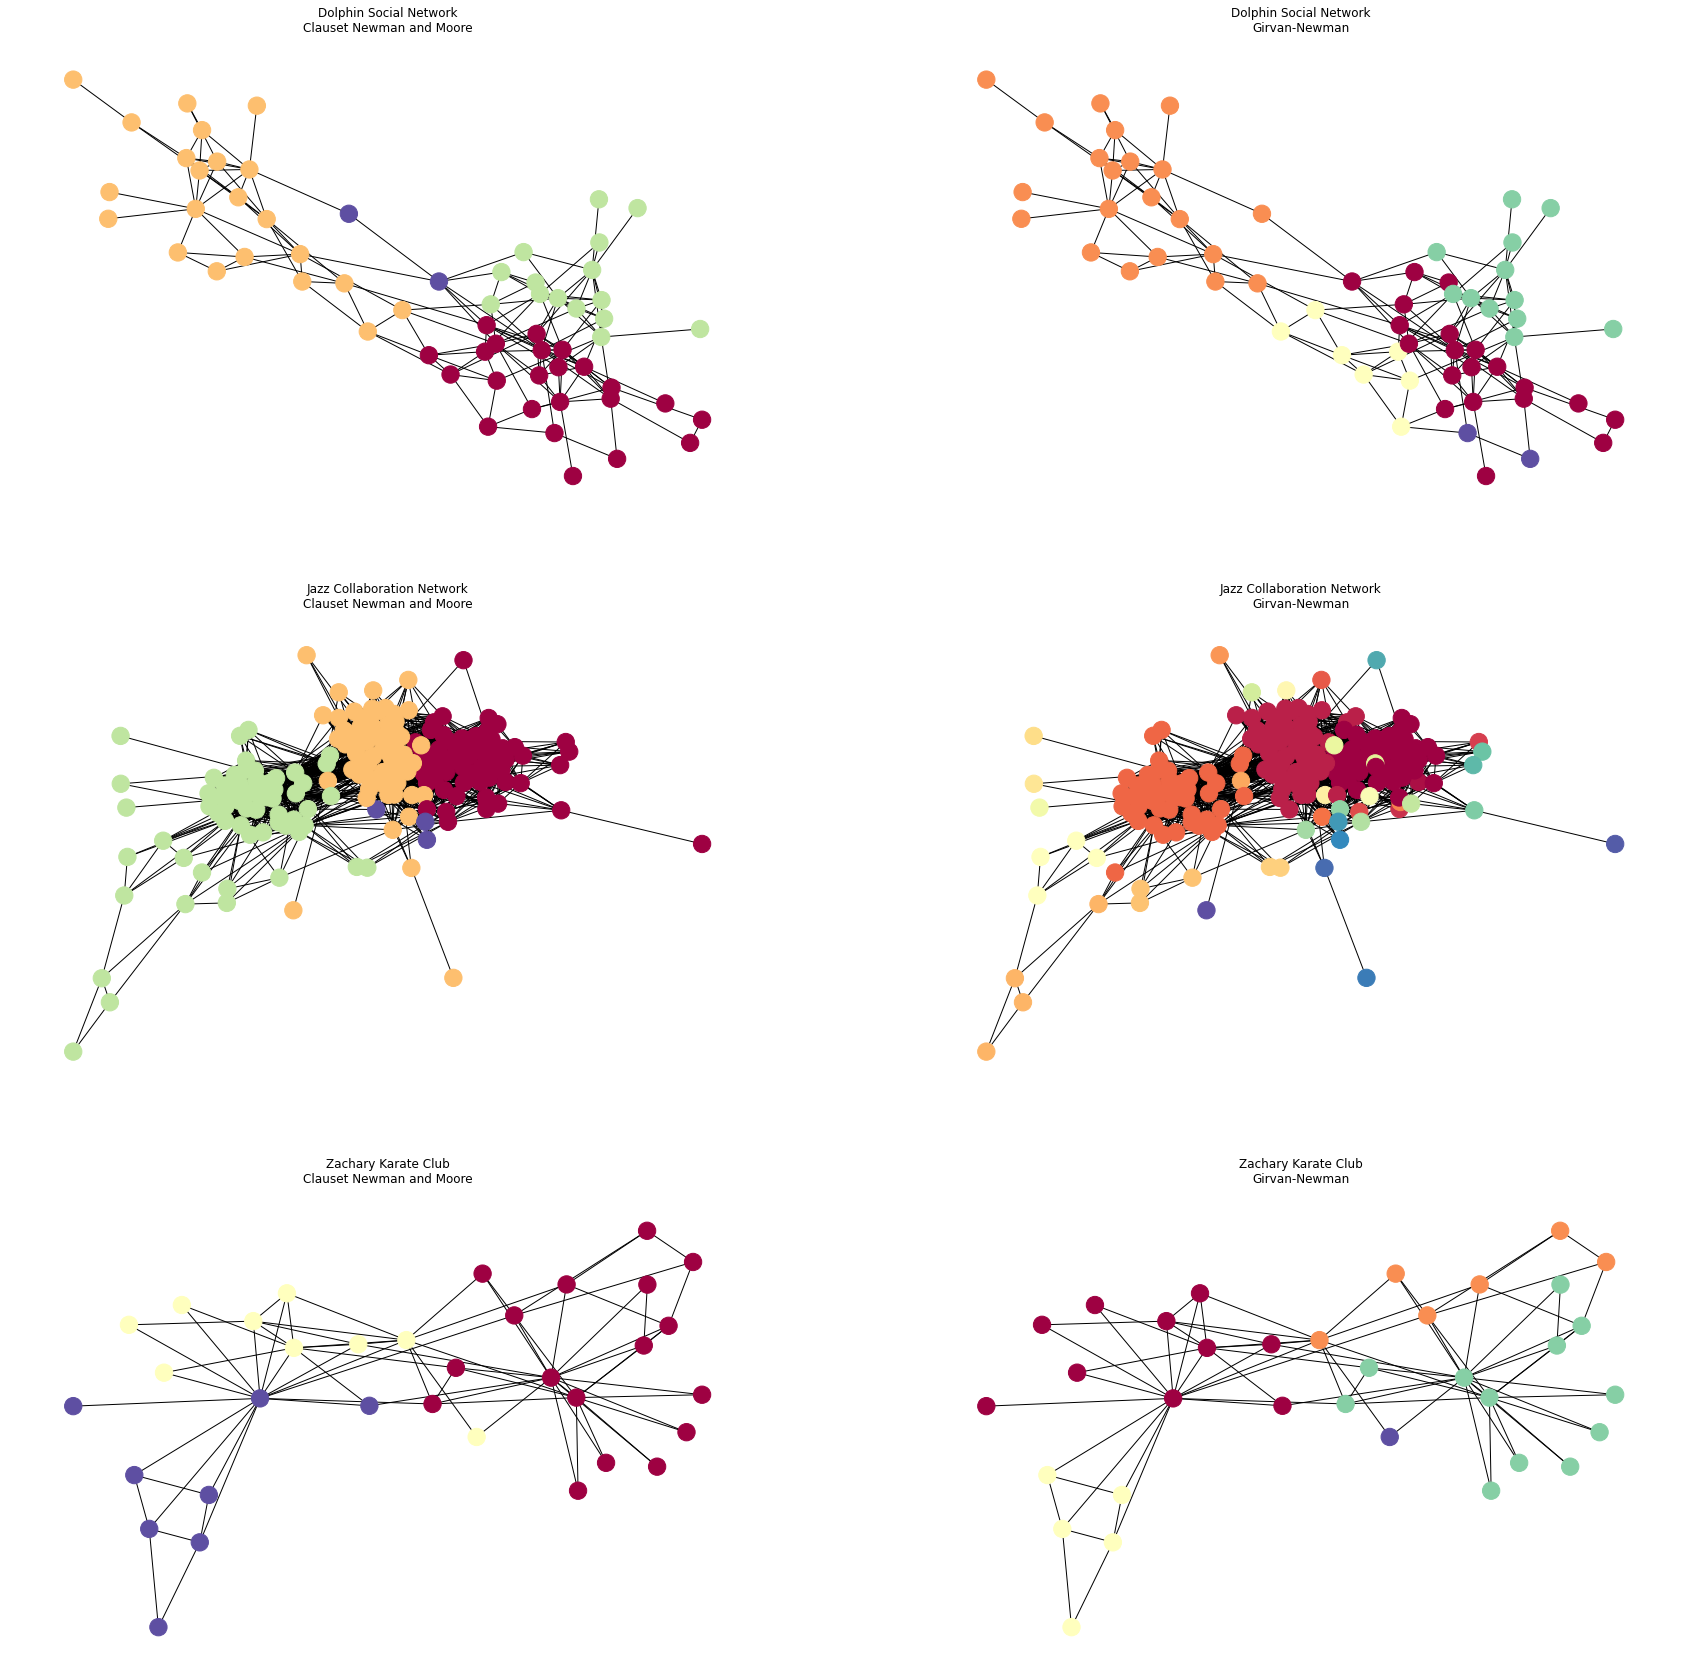

In [96]:
fgsz = 30
figure, axis = plt.subplots(3, 2, figsize=(fgsz, fgsz))

for i, (output_str, graph) in enumerate(str_n_graphs):
  
  ax = axis[i % 3, i // 3]
  second_ax = axis[i % 3, (i // 3)+1]

  comms = nx.algorithms.community.greedy_modularity_communities(graph)
  comms_amt = len(comms)

  color = cm.Spectral(np.linspace(0,1,comms_amt))
  node_colors = [None] * graph.number_of_nodes()

  for j, fzset in enumerate(comms):
    for el in fzset:
      node_colors[el] = color[j]
  gn_comms = nx.algorithms.community.girvan_newman(graph)
  max_mod = 0

  for c in gn_comms:
    calc_mod = nx.algorithms.community.modularity(graph, c)
    if calc_mod > max_mod:
      max_mod = calc_mod
      max_c = c
  
  gn_comms_amt = len(max_c)

  gn_color = cm.Spectral(np.linspace(0,1,gn_comms_amt))
  gn_node_colors = [None] * graph.number_of_nodes()

  for k, comm_el in enumerate(max_c):
    for cel in comm_el:
      gn_node_colors[cel] = gn_color[k]

  position = nx.spring_layout(graph)

  nx.draw(graph, ax=ax, pos=position, node_color = node_colors)
  ax.set_title(output_str+"\nClauset Newman and Moore")

  nx.draw(graph, ax=second_ax, pos=position, node_color = gn_node_colors)
  second_ax.set_title(output_str+"\nGirvan-Newman")

  rnd_graph = nx.algorithms.smallworld.random_reference(graph, niter = 5, connectivity=False)

  rnd_comms = nx.algorithms.community.greedy_modularity_communities(rnd_graph)
  rnd_comms_amt = len(rnd_comms)

  rnd_gn_comms = nx.algorithms.community.girvan_newman(rnd_graph)

  max_mod = 0

  for c in rnd_gn_comms:
    calc_mod = nx.algorithms.community.modularity(rnd_graph, c)
    if calc_mod > max_mod:
      max_mod = calc_mod
      max_c = c

  rnd_gn_comms_amt = len(max_c)
  
  print(f"{output_str} Clauset Newman and Moore: {comms_amt}")
  print(f"{output_str} Clauset Newman and Moore randomized: {rnd_comms_amt}")
  print(f"{output_str} Girvan-Newman: {gn_comms_amt}")
  print(f"{output_str} Girvan-Newman randomized: {rnd_gn_comms_amt}")

## A04.2 Random Graphs

###A04.2.1. Average degree

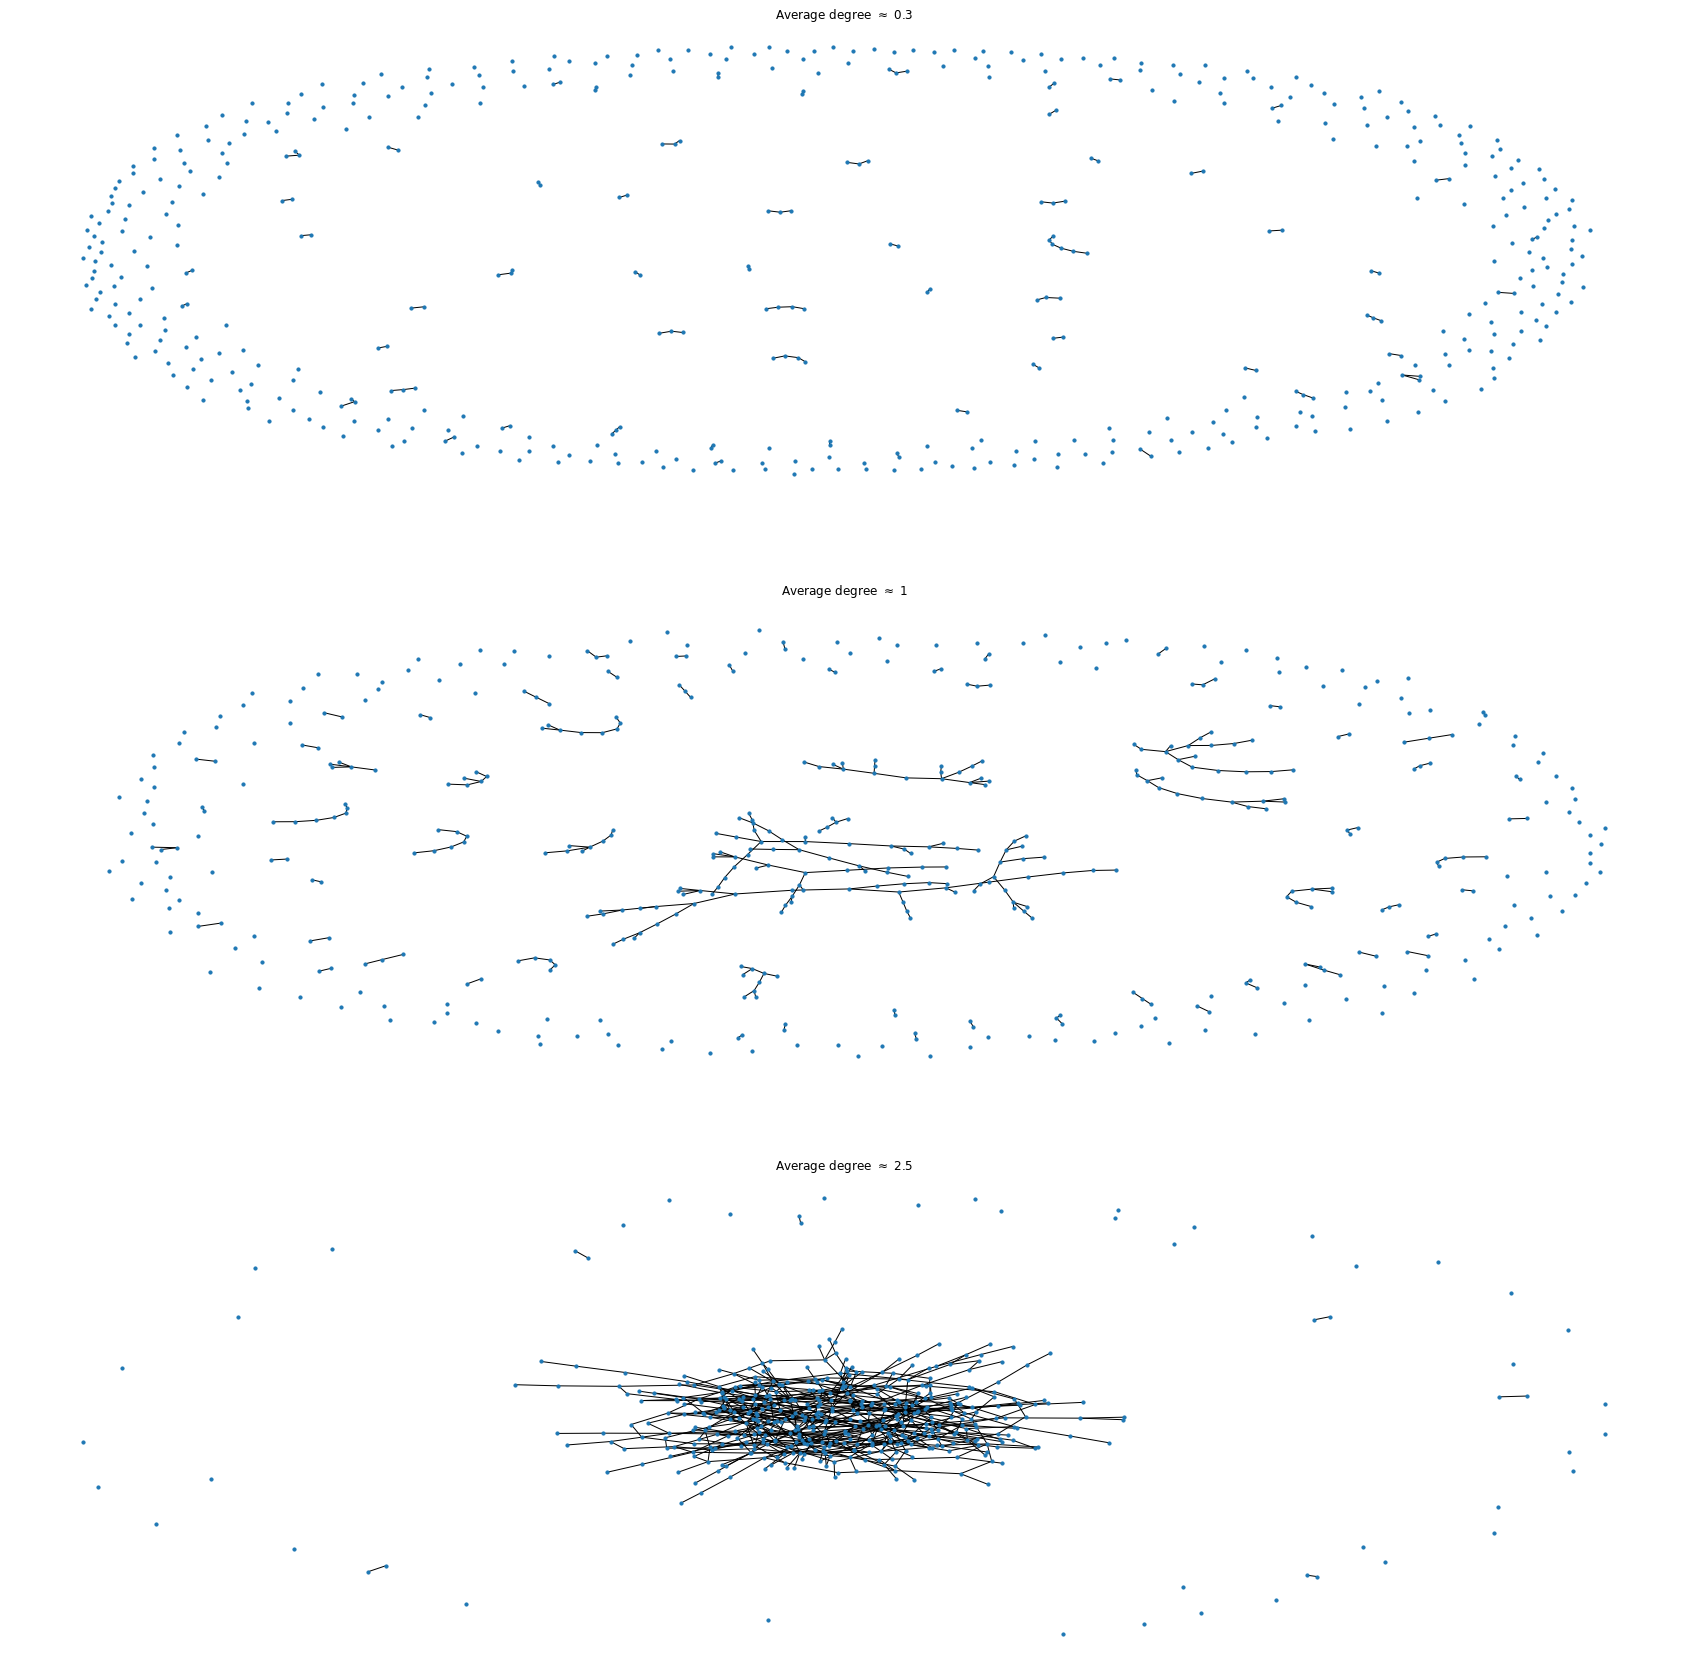

In [105]:
fgsz = 30
figure, axis = plt.subplots(3, 1, figsize=(fgsz, fgsz))

avg_degs = [0.3, 1, 2.5]

n = 500

for i, avg_deg in enumerate(avg_degs):
  g = nx.erdos_renyi_graph(n, avg_deg/(n-1))
  # print(np.mean([d for (n, d) in g.degree()]))
  position = nx.spring_layout(g, scale=50)
  ax = axis[i]
  ax.set_title(rf"Average degree $\approx$ {avg_deg}")
  nx.draw(g, ax=ax, pos=position, node_size = 10)

###A04.2.2.1 Largest connected component

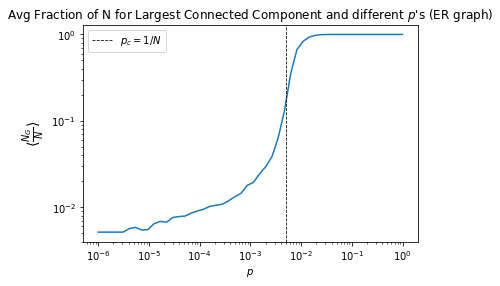

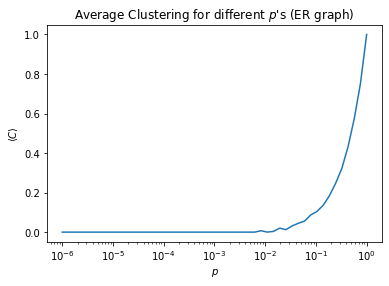

In [101]:
n = 200

p_s = np.logspace(-6, 0)
n_gs = []
c_s = []

for p in p_s:
  n_g = []
  for i in range(100):
    g = nx.erdos_renyi_graph(n, p)
    n_g.append(len(max([c for c in nx.connected_components(g)],key=len)))
  n_gs.append(np.mean(n_g))
  c_s.append(nx.average_clustering(g))

plt.figure()

plt.plot(p_s, [ng/n for ng in n_gs])
plt.axvline(1/n, linewidth=0.8, color="black", linestyle="dashed", label="$p_c = 1/N$")
plt.legend()

plt.yscale("log")
plt.xscale("log")
plt.xlabel("$p$")
plt.ylabel(r"$\langle \frac{N_G}{N} \rangle$", fontsize=14)
plt.title("Avg Fraction of N for Largest Connected Component and different $p$'s (ER graph)")

plt.show()

plt.figure()

plt.plot(p_s, c_s)

plt.xscale("log")
plt.xlabel("$p$")
plt.ylabel(r"$\langle C \rangle$")
plt.title("Average Clustering for different $p$'s (ER graph)")

plt.show()

The average clustering $\langle C \rangle$ is lower with lower $p$. This is due to the fact, that with a lower $p$ the probability of edges between nodes decrease as it is designed in the Erdos-Renyi algorithm. Hence, the neighbors of an arbitrary node $N$ tend to have less connections among each other and therefore the clustering coefficient is lower, since the numerator of the fraction to calculate the clustering coefficient is smaller.

## A04.3 Small-world with high clustering


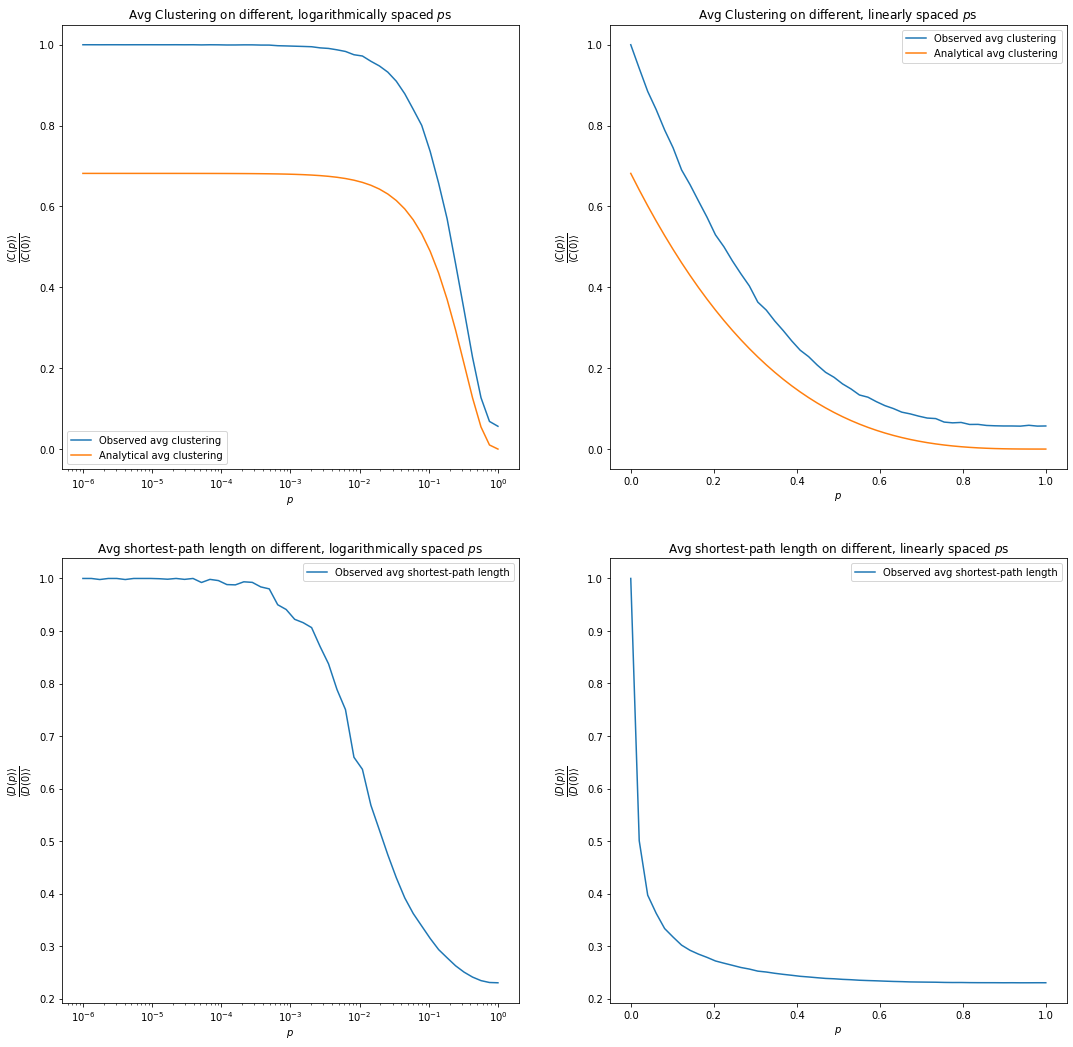

In [106]:
n = 150
k = 6
ps_log = np.logspace(-6, 0)
ps_lin = np.linspace(0, 1)

log_cs = [] 
log_ds = []
lin_cs = []
lin_ds = []


log_analytical = [(3/2)*((k-1)/(2*k-1))*(1-p)**3 for p in ps_log]
lin_analytical = [(3/2)*((k-1)/(2*k-1))*(1-p)**3 for p in ps_lin]

g_0 = nx.watts_strogatz_graph(n, k, 0)

c_0 = nx.average_clustering(g_0)
d_0 = nx.average_shortest_path_length(g_0)

for i in range(50):
  log_avg_cs = []
  log_avg_ds = []
  lin_avg_cs = []
  lin_avg_ds = []
  for j in range(100):
    g_log = nx.watts_strogatz_graph(n, k, ps_log[i])
    g_lin = nx.watts_strogatz_graph(n, k, ps_lin[i])
    log_avg_cs.append(nx.average_clustering(g_log)/c_0)
    log_avg_ds.append(nx.average_shortest_path_length(g_log)/d_0)
    lin_avg_cs.append(nx.average_clustering(g_lin)/c_0)
    lin_avg_ds.append(nx.average_shortest_path_length(g_lin)/d_0)
  log_cs.append(np.mean(log_avg_cs))
  log_ds.append(np.mean(log_avg_ds))
  lin_cs.append(np.mean(lin_avg_cs))
  lin_ds.append(np.mean(lin_avg_ds))

fgsz = 18
figure, axis = plt.subplots(2, 2, figsize=(fgsz, fgsz))

ax = axis[0,0]
ax.plot(ps_log, log_cs, label="Observed avg clustering")
ax.plot(ps_log, log_analytical, label="Analytical avg clustering")
ax.legend()

ax.set_xscale("log")
ax.set_xlabel("$p$")
ax.set_ylabel(r"$\frac{\langle C(p) \rangle}{\langle C(0) \rangle}$", fontsize=14)
ax.set_title("Avg Clustering on different, logarithmically spaced $p$s")

ax = axis[1,0]

ax.plot(ps_log, log_ds, label="Observed avg shortest-path length")
ax.legend()

ax.set_xscale("log")
ax.set_xlabel("$p$")
ax.set_ylabel(r"$\frac{\langle D(p) \rangle}{\langle D(0) \rangle}$", fontsize=14)
ax.set_title("Avg shortest-path length on different, logarithmically spaced $p$s")

ax = axis[0,1]

ax.plot(ps_lin, lin_cs, label="Observed avg clustering")
ax.plot(ps_lin, lin_analytical, label="Analytical avg clustering")
ax.legend()

ax.set_xlabel("$p$")
ax.set_ylabel(r"$\frac{\langle C(p) \rangle}{\langle C(0) \rangle}$", fontsize=14)
ax.set_title("Avg Clustering on different, linearly spaced $p$s")

ax = axis[1,1]

ax.plot(ps_lin, lin_ds, label="Observed avg shortest-path length")
ax.legend()

ax.set_xlabel("$p$")
ax.set_ylabel(r"$\frac{\langle D(p) \rangle}{\langle D(0) \rangle}$", fontsize=14)
ax.set_title("Avg shortest-path length on different, linearly spaced $p$s")

plt.show()